---

# Case Study: How Can a Wellness Technology Company Play It Smart?

In this scenario, we are working on the marketing analyst team which believes that analyzing smart device ﬁtness data could help unlock new growth opportunities for the company.

## The task

Analyze smart device data to gain insight into how consumers are using their smart devices. These insights will help guide marketing strategy for the company.


# The report

The insights will be presented following the data analysis process steps:

* **Ask**: Identify the problem to be solved and how our insights can drive business decisions.
* **Prepare**: Gather the relevant data, organize it and store it. Verify data integrity and credibility.
* **Process**: Choose tools to handle the data and identify its advantages. Clean our data and ensure it is ready for analysis. Document the cleaning process and save cleaned data.
* **Analyze**: Organize and format the data to answer our questions. Perform calculations and identify trends and relationships within the data.
* **Share**: Create visualizations to share most relevant findings. Relate findings to original questions.
* **Act**: present final conclusions and suggested approach to deal with findings and next steps.

---

# **Ask**:

## The business task

Analyze smart device usage data in order to gain insight into how people are already using their smart devices. Then, using this information, give high-level recommendations for how these trends can inform marketing strategy.

---

# **Prepare**:

## Getting the data

To answer our main question (*How current user trends can guide marketing strategy?*), we will use data from **[FitBit Fitness Tracker Data](https://www.kaggle.com/arashnic/fitbit)** (CC0: Public Domain, dataset made available through [Mobius](https://www.kaggle.com/arashnic)). This data set contains personal ﬁtness tracker from thirty three ﬁtbit users. These eligible Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. It includes information about daily activity, steps, and heart rate that can be used to explore users' habits.


A folder named `fitbit` stores 18 `csv` files with tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring.

To better read the files let's create a `path` variable to store the folder path containing all `csv` files.

Before that we need to import the libraries

In [9]:
import sqlite3 as sql
# import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [10]:
sns.set(rc={'figure.figsize': (10, 6)})
sns.set_style('whitegrid')
sns.set_palette('Set2')

In [11]:
path = '/content/sample_data/fitbit'
## Get the full path of all the csv files.
full_path_list = [os.path.join(path,f) for\
                 f in os.listdir(path) if os.path.isfile(os.path.join(path,f)) ]

Checking for integrity of our path list (should contain 18 file paths):

In [12]:
len(full_path_list)

18

List of all file paths containing data from Fitbit users:

In [13]:
full_path_list

['/content/sample_data/fitbit/hourlySteps_merged.csv',
 '/content/sample_data/fitbit/sleepDay_merged.csv',
 '/content/sample_data/fitbit/minuteCaloriesWide_merged.csv',
 '/content/sample_data/fitbit/minuteStepsWide_merged (1).csv',
 '/content/sample_data/fitbit/hourlyCalories_merged.csv',
 '/content/sample_data/fitbit/weightLogInfo_merged.csv',
 '/content/sample_data/fitbit/minuteSleep_merged.csv',
 '/content/sample_data/fitbit/dailyIntensities_merged.csv',
 '/content/sample_data/fitbit/dailySteps_merged.csv',
 '/content/sample_data/fitbit/minuteStepsNarrow_merged (1).csv',
 '/content/sample_data/fitbit/minuteMETsNarrow_merged.csv',
 '/content/sample_data/fitbit/dailyActivity_merged.csv',
 '/content/sample_data/fitbit/minuteCaloriesNarrow_merged.csv',
 '/content/sample_data/fitbit/dailyCalories_merged.csv',
 '/content/sample_data/fitbit/minuteIntensitiesWide_merged.csv',
 '/content/sample_data/fitbit/heartrate_seconds_merged (1).csv',
 '/content/sample_data/fitbit/minuteIntensitiesNarr

All 18 file paths were created to ease our access later on. In the next analysis phase we will start modifying the data as part of the cleaning and organizing process. 

---

#  **Process**

To clean and transform our data we will create a database using the [sqlite3](https://docs.python.org/3/library/sqlite3.html) module as an interface for [SQLite](https://www.sqlite.org/index.html) in **Python**. By doing this we can use SQL queries to quickly interact with our data.

## Creating the database

First of all, we need to create the database. We do this by creating a *connection* and starting a *cursor* in the desired database:

In [14]:
con = sql.connect("fitbit.db")
cur = con.cursor()

To easily insert all `csv` files as different tables in our database we can create a helper function to return the name of the `csv` file (without extension) to use as the table name.

In [15]:
def get_table_name(full_path_list, i):
    '''Returns name of csv file with no extension'''
    return full_path_list[i].split('/')[-1].split('.')[0]

Having this we can use the `pandas` library to insert all files as tables in our **fitbit.db** database. We do this by first reading the file as a pandas dataframe object (using the `read_csv` method) then we insert it into the database using the `to_sql` method with the proper connection to the database.

In [16]:
for i in range(0,18):
    pd.read_csv(full_path_list[i]).to_sql(get_table_name(full_path_list, i), con, if_exists='append', index=False)

The `if_exists='append'` argument ensures we append the table to the existing database.

We can do a quick sanity check and use `pandas` again to create a dataframe object from a simple query to the newly populated database.

In [17]:
# Simple query
df = pd.read_sql(f'SELECT * FROM {get_table_name(full_path_list, 0)}', con)

Now we can use the `head()` method to show the first 5 rows of data from the first inserted table.

In [18]:
df.head()

,Id,ActivityHour,StepTotal
0,1503960366,4/12/2016 12:00:00 AM,373
1,1503960366,4/12/2016 1:00:00 AM,160
2,1503960366,4/12/2016 2:00:00 AM,151
3,1503960366,4/12/2016 3:00:00 AM,0
4,1503960366,4/12/2016 4:00:00 AM,0


Finally, we can list all tables in our data base using a SQL query:

In [19]:
# Listing all tables
cur.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cur.fetchall()
print(tables)
print(50*'=')
print(f'Total of {len(tables)} tables in database.')

[('hourlySteps_merged',), ('sleepDay_merged',), ('minuteCaloriesWide_merged',), ('minuteStepsWide_merged (1)',), ('hourlyCalories_merged',), ('weightLogInfo_merged',), ('minuteSleep_merged',), ('dailyIntensities_merged',), ('dailySteps_merged',), ('minuteStepsNarrow_merged (1)',), ('minuteMETsNarrow_merged',), ('dailyActivity_merged',), ('minuteCaloriesNarrow_merged',), ('dailyCalories_merged',), ('minuteIntensitiesWide_merged',), ('heartrate_seconds_merged (1)',), ('minuteIntensitiesNarrow_merged',), ('hourlyIntensities_merged',)]
Total of 18 tables in database.


## Checking for redundant information

We will work with the tables with daily logs of activitys. There are a total of 5 tables with `daily` our `Day` in their names. Let's inspect them for redundant information.

To take a closer look at the daily data, let's read table `dailyActivity_merged` as a dataframe.

In [20]:
dailyActivity_df = pd.read_sql(f'SELECT * FROM dailyActivity_merged', con)

dailyActivity_df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


We do the same for the `dailyIntensities_merged` table.

In [21]:
dailyIntensities_df = pd.read_sql(f'SELECT * FROM dailyIntensities_merged', con)

dailyIntensities_df.head()

,Id,ActivityDay,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance
0,1503960366,4/12/2016,728,328,13,25,0.0,6.06,0.55,1.88
1,1503960366,4/13/2016,776,217,19,21,0.0,4.71,0.69,1.57
2,1503960366,4/14/2016,1218,181,11,30,0.0,3.91,0.40,2.44
3,1503960366,4/15/2016,726,209,34,29,0.0,2.83,1.26,2.14
4,1503960366,4/16/2016,773,221,10,36,0.0,5.04,0.41,2.71


These tables appear to have shared columns. Let's first find out if they have the same number of rows.

In [22]:
print(f'dailyActivity_df length: {len(dailyActivity_df)}')
print(f'dailyIntensities_df length: {len(dailyIntensities_df)}')

dailyActivity_df length: 940
dailyIntensities_df length: 940


The table `dailyIntensities_merged` seems to hold redundant information already contained in `dailyActivity_merged`.
The bellow query should return empty if all 8 columns related to Distance and Minutes of activity are redundant between these tables.

In [23]:
query = """
SELECT VeryActiveDistance, ModeratelyActiveDistance, LightActiveDistance, SedentaryActiveDistance, VeryActiveMinutes,
       FairlyActiveMinutes, LightlyActiveMinutes, SedentaryMinutes
FROM dailyActivity_merged
EXCEPT
SELECT VeryActiveDistance, ModeratelyActiveDistance, LightActiveDistance, SedentaryActiveDistance, VeryActiveMinutes,
       FairlyActiveMinutes, LightlyActiveMinutes, SedentaryMinutes
FROM dailyIntensities_merged;
"""
cur.execute(query)
print(cur.fetchall())

[]


The same ideia applies to tables `dailyActivity_merged` and `dailySteps_merged`. Both have columns related to total steps taken by date. In the former table this column is named `TotalSteps` and in the latter, `StepTotal`. Again, we can execute a EXCEPT statement to check if columns are redundant:

In [24]:
query = """
SELECT TotalSteps from dailyActivity_merged
EXCEPT
SELECT StepTotal from dailySteps_merged;
"""
cur.execute(query)
print(cur.fetchall())

[]


We repeat the same process for column `Calories` in `dailyCalories_merged`:

In [25]:
query = """
SELECT Calories from dailyActivity_merged
EXCEPT
SELECT Calories from dailyCalories_merged;
"""
cur.execute(query)
print(cur.fetchall())

[]


So, tables `dailyIntensities_merged`, `dailySteps_merged` and `dailyCalories_merged`  will not be used further as all information on them is contained in table `dailyActivity_merged`.

## Updating table to better read date information

We can update the ActivityDate column in `dailyActivity_merged` table to match the standard **YYY-MM-DD** from SQLite.

* **RUN THIS ONLY ONCE AT IT CHANGES THE DATABASE**

In [26]:
update_date = """
UPDATE dailyActivity_merged set ActivityDate = 
	SUBSTR(ActivityDate, -4)
	|| "-" ||
	CASE
		WHEN LENGTH(
			SUBSTR( -- picking month info
				ActivityDate, 1, INSTR(ActivityDate, '/') - 1
			)
		) > 1 THEN 
			SUBSTR( -- picking month info
				ActivityDate, 1, INSTR(ActivityDate, '/') - 1
			)
		ELSE '0' ||
			SUBSTR( -- picking month info
				ActivityDate, 1, INSTR(ActivityDate, '/') - 1
			)
	END
	|| "-" || 
	CASE
	WHEN LENGTH(
		SUBSTR( -- picking day info
			SUBSTR(ActivityDate, INSTR(ActivityDate, '/') + 1), -- pick substring starting after first /
			1,  -- start new substring at first character of newly selected substring
			INSTR(SUBSTR(ActivityDate, INSTR(ActivityDate, '/') + 1), '/') - 1 -- go all the way to next /
		)
	) > 1 THEN 
		SUBSTR( -- picking day info
			SUBSTR(ActivityDate, INSTR(ActivityDate, '/') + 1), -- pick substring starting after first /
			1,  -- start new substring at first character of newly selected substring
			INSTR(SUBSTR(ActivityDate, INSTR(ActivityDate, '/') + 1), '/') - 1 -- go all the way to next /
		)
	ELSE '0' ||
		SUBSTR( -- picking day info
			SUBSTR(ActivityDate, INSTR(ActivityDate, '/') + 1), -- pick substring starting after first /
			1,  -- start new substring at first character of newly selected substring
			INSTR(SUBSTR(ActivityDate, INSTR(ActivityDate, '/') + 1), '/') - 1 -- go all the way to next /
		)
	END;
"""
cur.execute(update_date)

To commit the changes we use the `commit()` method in our sql cursor.

In [27]:
con.commit()

We can close our connection to the database and check if tables were updated.

In [28]:
con.close()

## Data reagrding sleeping habbits

Beyond our `dailyActivity_merged` table, there is a separate table holding sleep information. We can do a query to inspect the table.

In [29]:
# Connect again to database
con = sql.connect("fitbit.db")
cur = con.cursor()

In [30]:
sleep_query = """
SELECT
	*
FROM
	sleepDay_merged;
"""

sleep_df = pd.read_sql(sleep_query, con)

In [31]:
sleep_df.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


Updating the day to match SQLite format `YYYY-MM-DD` (**execute only once**):

In [32]:
update_date = """
UPDATE sleepDay_merged set SleepDay = 
	SUBSTR(SUBSTR(SleepDay, 1, LENGTH(SleepDay) - 12), -4)
	|| "-" ||
	CASE
		WHEN LENGTH(
			SUBSTR( -- picking month info
				SUBSTR(SleepDay, 1, LENGTH(SleepDay) - 12), 1, INSTR(SUBSTR(SleepDay, 1, LENGTH(SleepDay) - 12), '/') - 1
			)
		) > 1 THEN 
			SUBSTR( -- picking month info
				SUBSTR(SleepDay, 1, LENGTH(SleepDay) - 12), 1, INSTR(SUBSTR(SleepDay, 1, LENGTH(SleepDay) - 12), '/') - 1
			)
		ELSE '0' ||
			SUBSTR( -- picking month info
				SUBSTR(SleepDay, 1, LENGTH(SleepDay) - 12), 1, INSTR(SUBSTR(SleepDay, 1, LENGTH(SleepDay) - 12), '/') - 1
			)
	END
	|| "-" || 
	CASE
	WHEN LENGTH(
		SUBSTR( -- picking day info
			SUBSTR(SUBSTR(SleepDay, 1, LENGTH(SleepDay) - 12), INSTR(SUBSTR(SleepDay, 1, LENGTH(SleepDay) - 12), '/') + 1), -- pick substring starting after first /
			1,  -- start new substring at first character of newly selected substring
			INSTR(SUBSTR(SUBSTR(SleepDay, 1, LENGTH(SleepDay) - 12), INSTR(SUBSTR(SleepDay, 1, LENGTH(SleepDay) - 12), '/') + 1), '/') - 1 -- go all the way to next /
		)
	) > 1 THEN 
		SUBSTR( -- picking day info
			SUBSTR(SUBSTR(SleepDay, 1, LENGTH(SleepDay) - 12), INSTR(SUBSTR(SleepDay, 1, LENGTH(SleepDay) - 12), '/') + 1), -- pick substring starting after first /
			1,  -- start new substring at first character of newly selected substring
			INSTR(SUBSTR(SUBSTR(SleepDay, 1, LENGTH(SleepDay) - 12), INSTR(SUBSTR(SleepDay, 1, LENGTH(SleepDay) - 12), '/') + 1), '/') - 1 -- go all the way to next /
		)
	ELSE '0' ||
		SUBSTR( -- picking day info
			SUBSTR(SUBSTR(SleepDay, 1, LENGTH(SleepDay) - 12), INSTR(SUBSTR(SleepDay, 1, LENGTH(SleepDay) - 12), '/') + 1), -- pick substring starting after first /
			1,  -- start new substring at first character of newly selected substring
			INSTR(SUBSTR(SUBSTR(SleepDay, 1, LENGTH(SleepDay) - 12), INSTR(SUBSTR(SleepDay, 1, LENGTH(SleepDay) - 12), '/') + 1), '/') - 1 -- go all the way to next /
		)
	END;
"""
cur.execute(update_date)

In [33]:
con.commit()

In [34]:
con.close()

In [35]:
con = sql.connect("fitbit.db")
cur = con.cursor()

Now we can check if the updates are correct:

* For the sleep table:

In [36]:
sleep_query = """
SELECT *,
	STRFTIME('%w',SleepDay) dow
FROM sleepDay_merged;
"""

sleep_df = pd.read_sql(sleep_query, con)

In [37]:
sleep_df.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,dow
0,1503960366,2016-04-12,1,327,346,2
1,1503960366,2016-04-13,2,384,407,3
2,1503960366,2016-04-15,1,412,442,5
3,1503960366,2016-04-16,2,340,367,6
4,1503960366,2016-04-17,1,700,712,0


The date now is in the proper `YYYY-MM-DD` format.

* For the activity table:

In [38]:
dailyActivity_df = pd.read_sql('SELECT * FROM dailyActivity_merged', con)

In [39]:
dailyActivity_df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


Again, the dates are now in the proper format.

As was done in the sleep dataframe, we can use the function `STRFTIME()` from SQLite to extract information on the day, month, year and day of the week (*dow*) from the formated dates:

In [40]:
full_info_activity = """
SELECT *,
	STRFTIME('%d',ActivityDate) day,
	STRFTIME('%m',ActivityDate) month,
	STRFTIME('%Y',ActivityDate) year,
	STRFTIME('%w',ActivityDate) dow
FROM dailyActivity_merged;
"""

full_dailyActivity_df = pd.read_sql(full_info_activity, con)

We saved the resulting query in a larger dataframe named `full_dailyActivity_df`. The first 5 rows of this dataframe are as follows.

In [41]:
full_dailyActivity_df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,day,month,year,dow
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,12,04,2016,2
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,13,04,2016,3
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,14,04,2016,4
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,15,04,2016,5
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,16,04,2016,6


# **Analyze**

## Creating usefull dataframes

To ease our analyses further down the road, we can use our updated tables to create helper dataframes.

First, a sanity check on our daily activity table:

In [42]:
# Different users
cur.execute("SELECT COUNT(DISTINCT Id) FROM dailyActivity_merged;")
print('Different users: ', cur.fetchall()[0][0])

Different users:  33


### Data on Average Calories, Steps and Distance by Id and by day of the week

In [43]:
# Average Calories, Steps and Distance by Id and by day of the week
query = """
SELECT 
	Id,
	STRFTIME('%w', ActivityDate) dow,
	ROUND(AVG(Calories),2) AS avg_calories,
	ROUND(AVG(TotalSteps),2) AS avg_steps,
	ROUND(AVG(TotalDistance),2) AS avg_distance
FROM dailyActivity_merged
GROUP BY Id, STRFTIME('%w', ActivityDate);
"""

activity_dist = pd.read_sql(query, con)

In [44]:
activity_dist.head()

,Id,dow,avg_calories,avg_steps,avg_distance
0,1503960366,0,1769.00,10101.50,6.57
1,1503960366,1,1939.25,13780.75,8.96
2,1503960366,2,1967.80,13946.60,8.92
3,1503960366,3,1868.80,12656.60,8.23
4,1503960366,4,1481.60,9500.60,6.10


### "Boolean" column to check if date corresponds to weekend

In [45]:
weekend_query = """
SELECT 
	Id,
	ActivityDate,
	SedentaryMinutes,
	VeryActiveMinutes,
	FairlyActiveMinutes,
	LightlyActiveMinutes,
	Calories,
	TotalSteps,
	TotalDistance,
	CASE 
		WHEN STRFTIME('%w',ActivityDate) IN ('0','6')
			THEN 1
		ELSE 0
	END weekend
FROM dailyActivity_merged;
"""

weekend_check = pd.read_sql(weekend_query, con)

weekend_check.head()

,Id,ActivityDate,SedentaryMinutes,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,Calories,TotalSteps,TotalDistance,weekend
0,1503960366,2016-04-12,728,25,13,328,1985,13162,8.50,0
1,1503960366,2016-04-13,776,21,19,217,1797,10735,6.97,0
2,1503960366,2016-04-14,1218,30,11,181,1776,10460,6.74,0
3,1503960366,2016-04-15,726,29,34,209,1745,9762,6.28,0
4,1503960366,2016-04-16,773,36,10,221,1863,12669,8.16,1


## NOTE: day of week 0-6 with Sunday==0

### Joining activity data with sleep data

In [46]:
join_query = """
SELECT 
	A.Id,
	A.ActivityDate,
	A.SedentaryMinutes,
	A.LightlyActiveMinutes,
	S.TotalMinutesAsleep
FROM 
	dailyActivity_merged A
INNER JOIN sleepDay_merged S
ON 
	A.Id = S.Id AND
    A.ActivityDate = S.SleepDay;
"""
activity_sleep_df = pd.read_sql(join_query, con)

activity_sleep_df.head()

,Id,ActivityDate,SedentaryMinutes,LightlyActiveMinutes,TotalMinutesAsleep
0,1503960366,2016-04-12,728,328,327
1,1503960366,2016-04-13,776,217,384
2,1503960366,2016-04-15,726,209,412
3,1503960366,2016-04-16,773,221,340
4,1503960366,2016-04-17,539,164,700


## **Initial exploratory visualizations**

### **How users spend their activity time?**

In our `dailyActivity_df` there are four measures of how users spend their time:
* `VeryActiveMinutes` that lead to `VeryActiveDistance`
* `FairlyActiveMinutes` that lead to `ModeratelyActiveDistance`
* `VeryLightlyActiveMinutes` that lead to `LightActiveDistance`
* `SedentaryMinutes` that lead to `SedentaryActiveDistance`

We can plot each pair in a **scatter plot** (*Distance* vs. *Minutes*) with a regression line to get estimate of the *speed* of users during these activities.
To ease the comparison, we'll plot all four graphs with  shared y-scale.

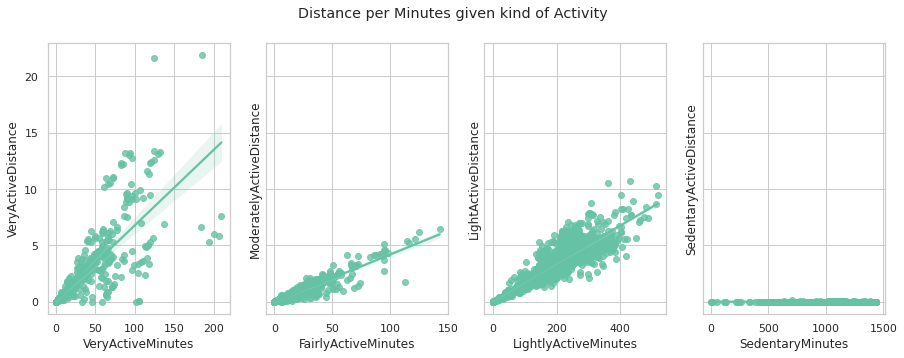

In [47]:
fig, axes = plt.subplots(1, 4, figsize=(15, 5), sharey=True)
fig.suptitle('Distance per Minutes given kind of Activity')

sns.regplot(data = dailyActivity_df, x = 'VeryActiveMinutes', y = 'VeryActiveDistance', ax=axes[0])

sns.regplot(data = dailyActivity_df, x = 'FairlyActiveMinutes', y = 'ModeratelyActiveDistance', ax=axes[1])

sns.regplot(data = dailyActivity_df, x = 'LightlyActiveMinutes', y = 'LightActiveDistance', ax=axes[2])

sns.regplot(data = dailyActivity_df, x = 'SedentaryMinutes', y = 'SedentaryActiveDistance', ax=axes[3])

As expected, the **VeryActive** distances are *traveled* in shorter times (that is, they have larger speeds represented by steeper regression lines). A somewhat unexpected result here is that *LightlyActiveMinutes* lead to greater speeds than *FairlyActiveMinutes*. **It would be interesting to know how this classification is done to actually understand the difference between "Light" activities and "Moderate" activities.**

### **How does the number of steps taken in a day affect the amount of calories burned?**

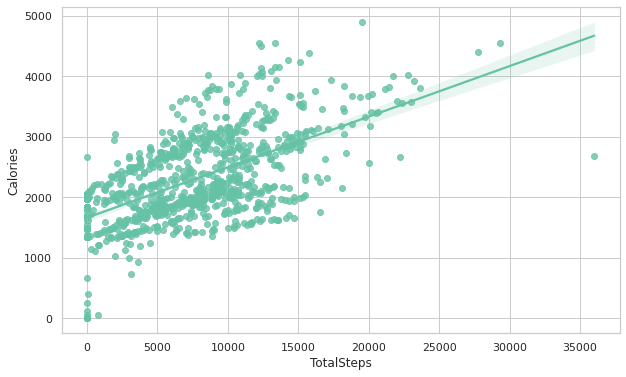

In [48]:
sns.regplot(data = full_dailyActivity_df, x= 'TotalSteps', y ='Calories');

Once more, as expected the amount of calories burned in a day grows as the user takes more steps. An inetersting fact is that the intercept of the regression line represents the amount of burned calories in a day with **no steps** taken. This is the amount of calories users are burning in a very sedentary day. According to the [Healthline site](https://www.healthline.com/health/calories-burned-sleeping#Determining-how-many-calories-you-burn), this number corresponds to the *basal metabolic rate*:

> Your basal metabolic rate (BMR), on the other hand, represents the number of calories you individually burn a day at rest, or while you’re sedentary. This includes sleeping and sitting.

This value can be calculated (again referring to [Healthline](https://www.healthline.com/health/calories-burned-sleeping#Determining-how-many-calories-you-burn)) if we know the user's sex, weight, height and  age. In their own calculations, a 35-year-old man who weighs 175 pounds and is 5 feet 11 inches would have a *BMR* of 1,816 calories and a 35-year-old woman who weighs 135 pounds and is 5 feet, 5 inches would have a *BMR* of 1,383 calories.



There are 4 rows with all zero values except for the `SedentaryMinutes` column. In this column we see that users spent 1440 minutes of sedentary activity in a single day. 1440minutes divided by 60minutes/hour = 24h. So, it seems the tracker may have been turned off the entire day our experience some malfunction. We should get rid of these data points in further analysis.

We redefine our `full_dailyActivity_df` dropping the outliers:

In [49]:
full_info_activity = """
SELECT *,
	STRFTIME('%d',ActivityDate) day,
	STRFTIME('%m',ActivityDate) month,
	STRFTIME('%Y',ActivityDate) year,
	STRFTIME('%w',ActivityDate) dow
FROM 
	dailyActivity_merged
WHERE
	Calories <> 0;
"""

full_dailyActivity_df = pd.read_sql(full_info_activity, con)

In [50]:
len(full_dailyActivity_df)

936

Our data frame is now 936 rows long, given we dropped the four outliers. We can now see if these made a difference in the regression parameters. To simplify our flow, let's turn the regression process into a single function:

In [51]:
def get_regression(full_dailyActivity_df, x ='TotalSteps', y = 'Calories'):
    X = full_dailyActivity_df[x].values.reshape((-1, 1))
    y = full_dailyActivity_df[y].values

    model = LinearRegression()
    model.fit(X, y)

    print('intercept:', model.intercept_)
    print('slope:', model.coef_)

    sns.scatterplot(data = full_dailyActivity_df, x= x, y =y)
    # plt.title('Calories burned by number of steps taken')
    abline(model.coef_, model.intercept_);

    return (model.intercept_, model.coef_)

In [53]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [55]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, color= 'r', ls = '--')

intercept: 1689.1510000144017
slope: [0.08138959]


(1689.1510000144017, array([0.08138959]))

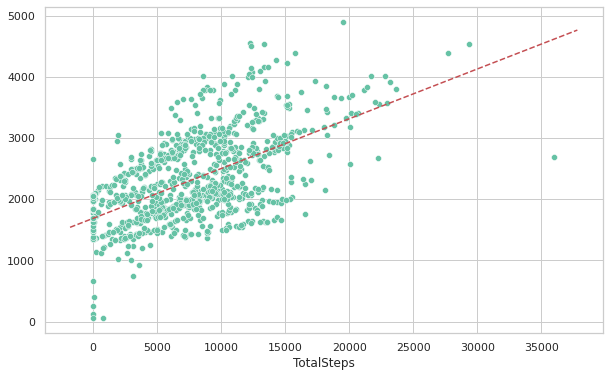

In [56]:
get_regression(full_dailyActivity_df)

Wihtout the outliers, our fit has a slightly higher intercept of ~1689.15 (correspondong to the *BMR*).

### **Distribution according to type of activity**

Excluding `SedentaryMinutes`, all users spend their daily time between three types of activities:
* `VeryActiveMinutes`
* `FairlyActiveMinutes`
* `VeryLightlyActiveMinutes`

We can use **histograms** to check how are this *minutes* distributed accross users:

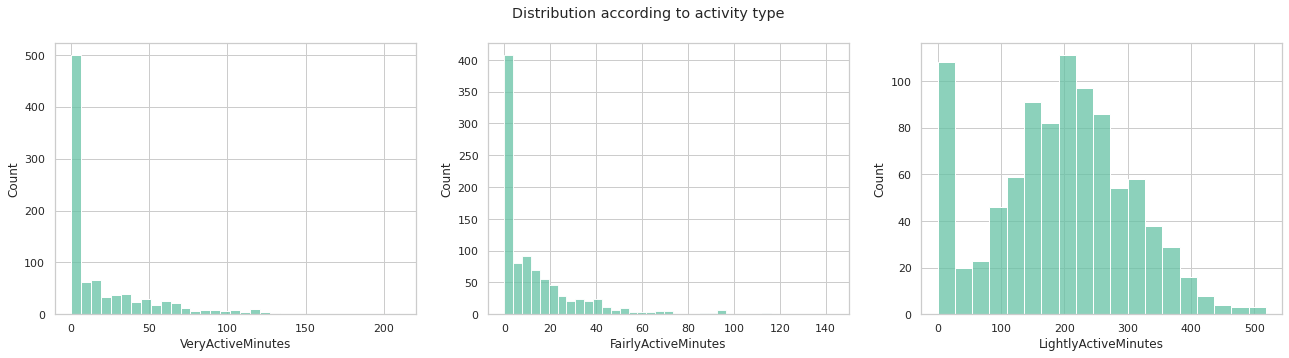

In [57]:
fig, axes = plt.subplots(1, 3, figsize=(22, 5))
fig.suptitle('Distribution according to activity type')

sns.histplot(data = full_dailyActivity_df, x = 'VeryActiveMinutes', ax = axes[0]);

sns.histplot(data = full_dailyActivity_df, x = 'FairlyActiveMinutes', ax = axes[1]);

sns.histplot(data = full_dailyActivity_df, x = 'LightlyActiveMinutes', ax = axes[2]);

We can see from these plots that a great number of users (over 400) spend very few minutes as Very or Fairly Active. The distribution of `LightlyActiveMinutes` on the other hand is very symmetrical exluding the very low minutes.

There is an issue here, however: it is not clear if all users were using the tracker during the entire day in the analysed period. If a user logs the whole day, then the sum `VeryActiveMinutes + FairlyActiveMinutes + LightlyActiveMinutes + SedentaryMinutes` should equal 1440 (the total number of minutes in a day).

Let's use SQL to select only those points where this condition is true:

In [58]:
full_day_activity = """
SELECT *,
	STRFTIME('%d',ActivityDate) day,
	STRFTIME('%m',ActivityDate) month,
	STRFTIME('%Y',ActivityDate) year,
	STRFTIME('%w',ActivityDate) dow,
	VeryActiveMinutes+FairlyActiveMinutes+LightlyActiveMinutes+SedentaryMinutes AS TotalMinutes
FROM 
	dailyActivity_merged
WHERE
	Calories <> 0 AND
	TotalMinutes = 1440;
"""

logged_day_df = pd.read_sql(full_day_activity, con)

In [59]:
logged_day_df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,day,month,year,dow,TotalMinutes
0,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,14,04,2016,4,1440
1,1503960366,2016-04-18,13019,8.59,8.59,0.0,3.25,0.64,4.71,0.0,42,16,233,1149,1921,18,04,2016,1,1440
2,1503960366,2016-04-22,12764,8.13,8.13,0.0,4.76,1.12,2.24,0.0,66,27,130,1217,1827,22,04,2016,5,1440
3,1503960366,2016-04-27,18134,12.21,12.21,0.0,6.40,0.41,5.41,0.0,78,11,243,1108,2159,27,04,2016,3,1440
4,1503960366,2016-05-04,11100,7.15,7.15,0.0,2.46,0.87,3.82,0.0,36,22,203,1179,1819,04,05,2016,3,1440


In [60]:
print(f'There are {len(logged_day_df)} rows where users logged the whole day.')

There are 474 rows where users logged the whole day.


We can, now, see the distributions in these rows:

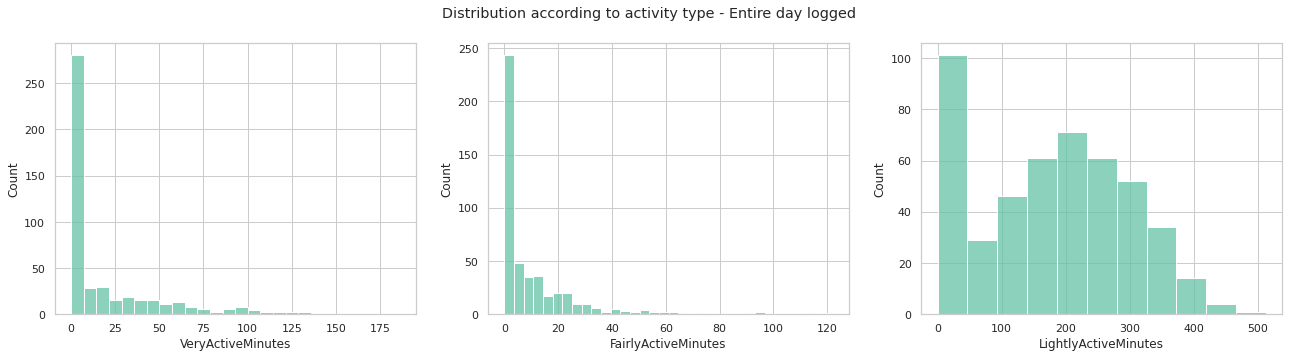

In [61]:
fig, axes = plt.subplots(1, 3, figsize=(22, 5))
fig.suptitle('Distribution according to activity type - Entire day logged')

sns.histplot(data = logged_day_df, x = 'VeryActiveMinutes', ax = axes[0]);

sns.histplot(data = logged_day_df, x = 'FairlyActiveMinutes', ax = axes[1]);

sns.histplot(data = logged_day_df, x = 'LightlyActiveMinutes', ax = axes[2]);

The behaviour here is similar. Let's see what happens to the days when users did not logged the 24h:

In [62]:
not_full_day = """
SELECT *,
	STRFTIME('%d',ActivityDate) day,
	STRFTIME('%m',ActivityDate) month,
	STRFTIME('%Y',ActivityDate) year,
	STRFTIME('%w',ActivityDate) dow,
	VeryActiveMinutes+FairlyActiveMinutes+LightlyActiveMinutes+SedentaryMinutes AS TotalMinutes
FROM 
	dailyActivity_merged
WHERE
	Calories <> 0 AND
	TotalMinutes <> 1440;
"""

not_logged_day_df = pd.read_sql(not_full_day, con)

In [63]:
not_logged_day_df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,day,month,year,dow,TotalMinutes
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,12,04,2016,2,1094
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,13,04,2016,3,1033
2,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,15,04,2016,5,998
3,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,16,04,2016,6,1040
4,1503960366,2016-04-17,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728,17,04,2016,0,761


In [64]:
print(f'There are {len(not_logged_day_df)} rows where users logged parts of the day.')

There are 462 rows where users logged parts of the day.


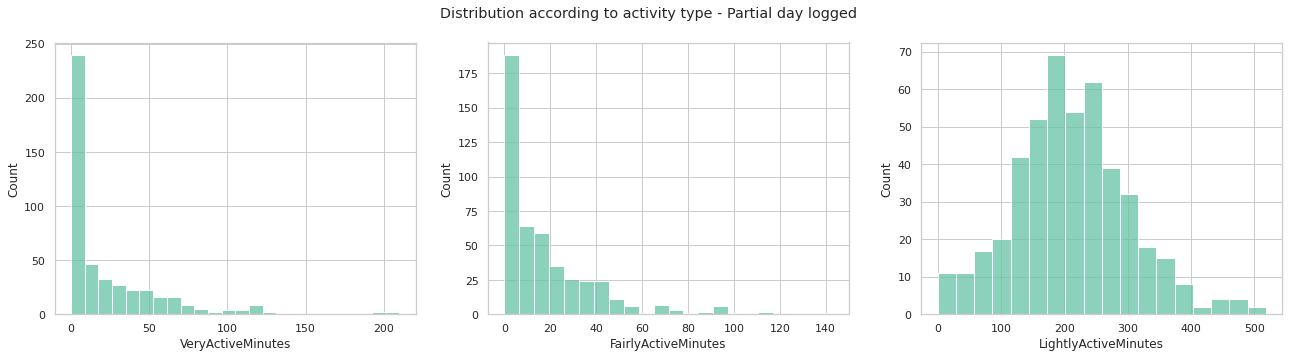

In [65]:
fig, axes = plt.subplots(1, 3, figsize=(22, 5))
fig.suptitle('Distribution according to activity type - Partial day logged')

sns.histplot(data = not_logged_day_df, x = 'VeryActiveMinutes', ax = axes[0]);

sns.histplot(data = not_logged_day_df, x = 'FairlyActiveMinutes', ax = axes[1]);

sns.histplot(data = not_logged_day_df, x = 'LightlyActiveMinutes', ax = axes[2]);

Ok, now we see a difference! The `LightlyActiveMinutes` distribution is very symmetric with no peak at very few minutes of activity. Users who log the entire day may end up registering a lot of `LightlyActiveMinutes` while those who log only a part of the day might be registering only activities with higher demand.

Let's see the distribution of total logged time in this second group.

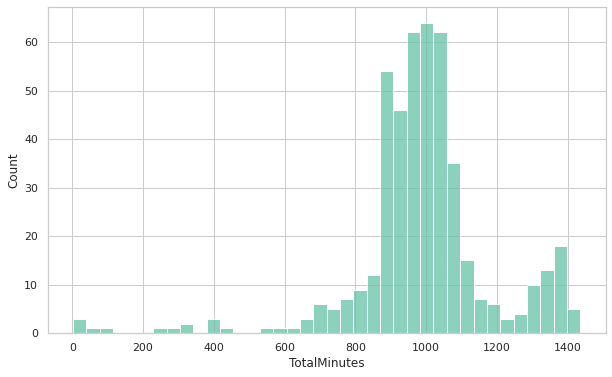

In [66]:
sns.histplot(data = not_logged_day_df, x = 'TotalMinutes');

### **Sleeping habits and week day distributions**

We can use **histograms** again to see the distribution of sleeping time for all users.

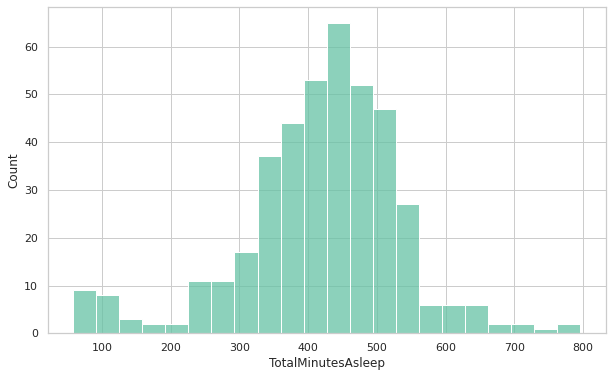

In [67]:
sns.histplot(data = sleep_df, x = 'TotalMinutesAsleep');

According to the [CDC](https://www.cdc.gov/sleep/about_sleep/how_much_sleep.html) an adult should get **7 or more** hours of sleep per day. This corresponds to 420 minutes. We can plot a line at this value to see how the users do against this recommendation.

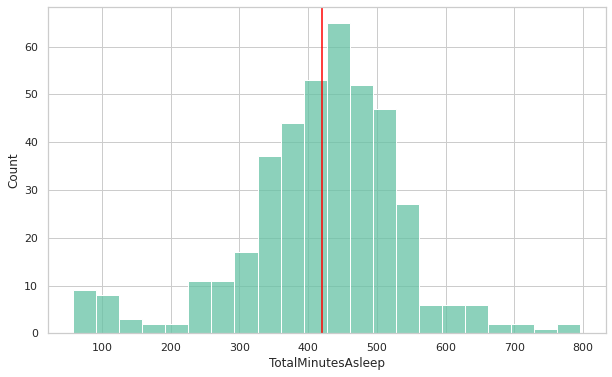

In [68]:
sns.histplot(data = sleep_df, x = 'TotalMinutesAsleep')
plt.axvline(420, 0, 65, color='red');

The distribution is somewhat symmetric with 231 rows to the right of the line (including the line) and 182 rows to the left.

We can further inspect the distribution of minutes asleep per week day:

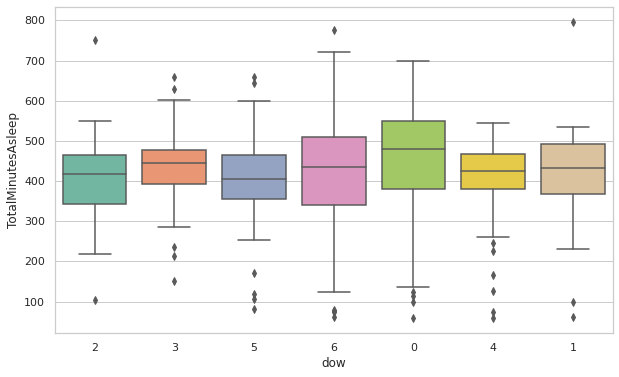

In [69]:
sns.boxplot(x="dow", y="TotalMinutesAsleep", data=sleep_df);

We can order this plot by the day of the week:

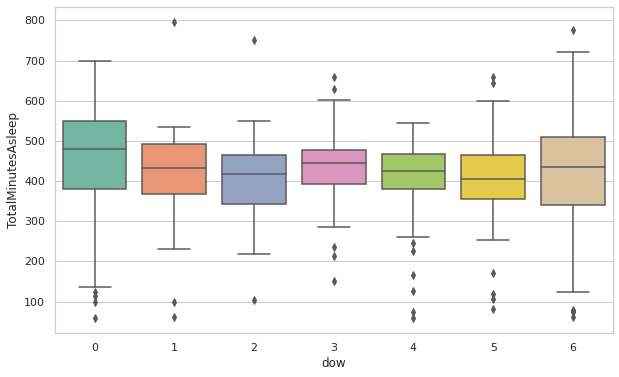

In [70]:
sns.boxplot(x="dow", y="TotalMinutesAsleep", data=sleep_df,
            order = ['0','1','2','3','4','5','6']);

There is no clear distinction between the days of the week. However we can see that sunday has the largest median for `TotalMinutesAsleep` and saturday appears to be the most spread oout distribution.

While we are looking at distributions across days of the week, we can use our `activity_dist` dataframe to inspect the average values of steps, calories and distances:

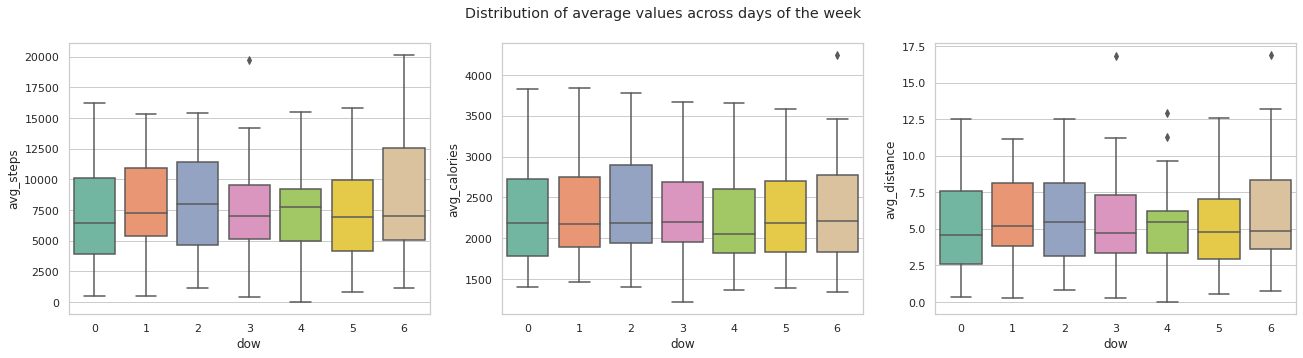

In [71]:
fig, axes = plt.subplots(1, 3, figsize=(22, 5))
fig.suptitle('Distribution of average values across days of the week')

sns.boxplot(x="dow", y="avg_steps", data=activity_dist, ax=axes[0]);

sns.boxplot(x="dow", y="avg_calories", data=activity_dist, ax=axes[1]);

sns.boxplot(x="dow", y="avg_distance", data=activity_dist, ax=axes[2]);

### **Distribution of calories and distance**

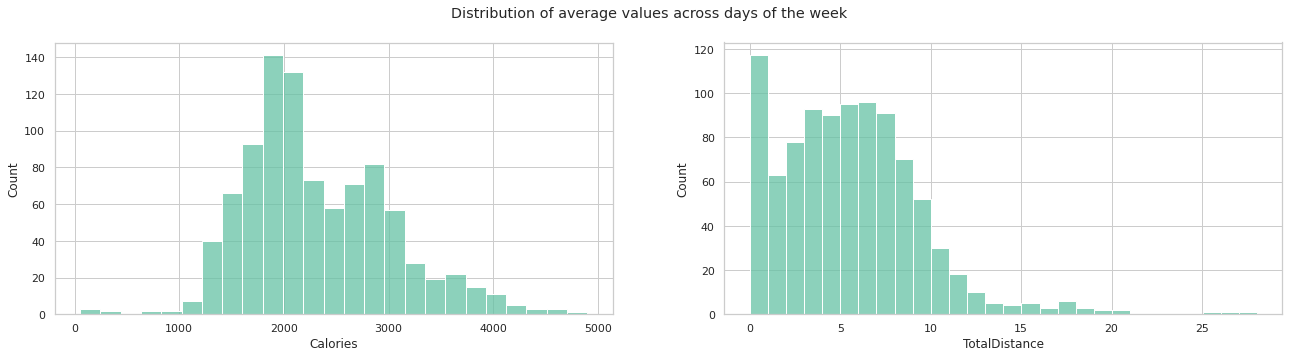

In [72]:
fig, axes = plt.subplots(1, 2, figsize=(22, 5))
fig.suptitle('Distribution of average values across days of the week')

sns.histplot(data=full_dailyActivity_df, x="Calories", ax = axes[0]);

sns.histplot(data=full_dailyActivity_df, x="TotalDistance", ax = axes[1]);

The distribution of burned calories is a bit skewed to the low calories while the distance distribtion is higly skewed to lower distances.

### **How does sedentary minutes change in weekends?**

First of all, not considering the day of the week, let's take a look at the distribtuion of `SedentaryMinutes`:

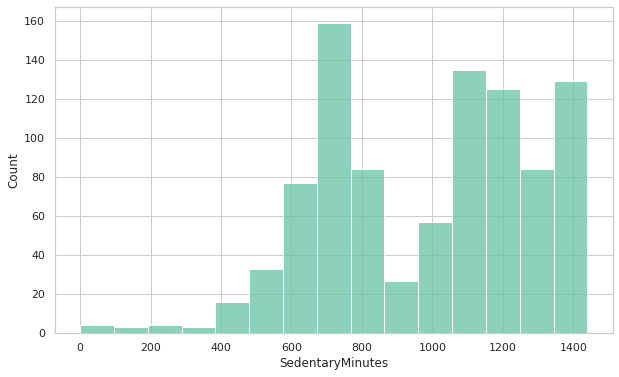

In [73]:
sns.histplot(data= weekend_check, x = 'SedentaryMinutes');

To get a visual on how this distribution depends on weekends we can use our `weekend_check` dataframe and use a facetplot to see two graphs (for weekend being true or false). Besides this, I'll normalize the distributions so we can compare both graphs (because there a lot fewer weekends than week days - sadly...).

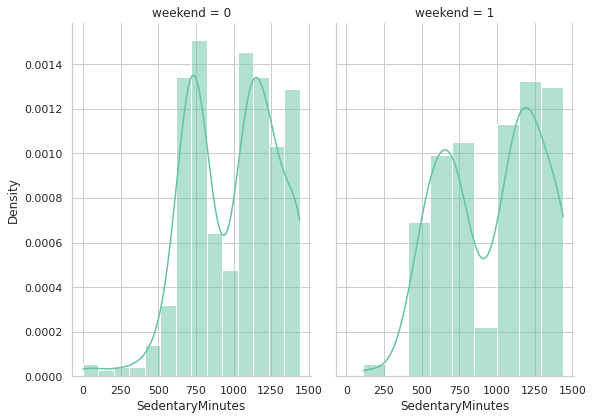

In [74]:
g = sns.FacetGrid(weekend_check, col="weekend", height=6, aspect=.7)
g.map(sns.histplot, "SedentaryMinutes", kde=True, stat='density');

It seems there are two groups of users based on the distribution of `SedentaryMinutes`.
We can do a query to get the average `SedentaryMinutes` per user:

In [75]:
query = """
SELECT
	Id,
	AVG(SedentaryMinutes) AS AvgSedentaryMinutes
FROM
	dailyActivity_merged
GROUP BY
	Id
ORDER BY
	AvgSedentaryMinutes DESC;
"""
avg_sed_minutes = pd.read_sql(query, con)

avg_sed_minutes

,Id,AvgSedentaryMinutes
0,1927972279,1317.419355
1,6775888955,1299.423077
2,8253242879,1287.368421
3,8583815059,1267.225806
4,1624580081,1257.741935
5,4020332650,1237.258065
6,2320127002,1220.096774
7,4057192912,1217.250000
8,1844505072,1206.612903
9,6290855005,1193.034483


A bar plot will be nice to visually see this numbers:

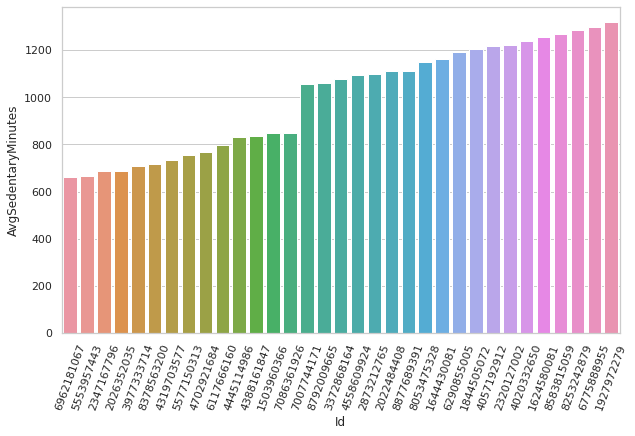

In [76]:
sns.barplot(data = avg_sed_minutes,
            x = 'Id', y = 'AvgSedentaryMinutes',
            order=avg_sed_minutes.sort_values('AvgSedentaryMinutes',ascending = True)['Id'])
plt.xticks(rotation=70);

The average `SedentaryMinutes` is given by:

In [77]:
cur.execute("SELECT	AVG(SedentaryMinutes) FROM dailyActivity_merged;")
sedMinAvg = cur.fetchall()[0][0]
print(sedMinAvg)

991.2106382978724


We can create a column to identify this user group. We'll call group 1 those with `SedentaryMinutes` above average and group 0, those bellow.

In [78]:
def is_above(user):
    '''Returns 1 if user has average SedentaryMinutes above the total average and 0 otherwise'''
    return int(avg_sed_minutes[avg_sed_minutes['Id']==user]['AvgSedentaryMinutes'].values[0] > sedMinAvg)

In [79]:
weekend_check['UserGroup'] = weekend_check['Id'].apply(is_above)

In [80]:
# Rows in each group
print(f'Rows in group 0 (Less Sedentary group):')
print(len(weekend_check[weekend_check['UserGroup']==0]))
print(f'Rows in group 1 (More Sedentary group):')
print(len(weekend_check[weekend_check['UserGroup']==1]))

#Distinct users in each group
print('Distinct users in group 0 (Less Sedentary group)')
print(weekend_check[weekend_check['UserGroup']==0]['Id'].nunique())

print('Distinct users in group 1 (More Sedentary group)')
print(weekend_check[weekend_check['UserGroup']==1]['Id'].nunique())

Rows in group 0 (Less Sedentary group):
416
Rows in group 1 (More Sedentary group):
524
Distinct users in group 0 (Less Sedentary group)
14
Distinct users in group 1 (More Sedentary group)
19


Visual on the number of rows in each group:

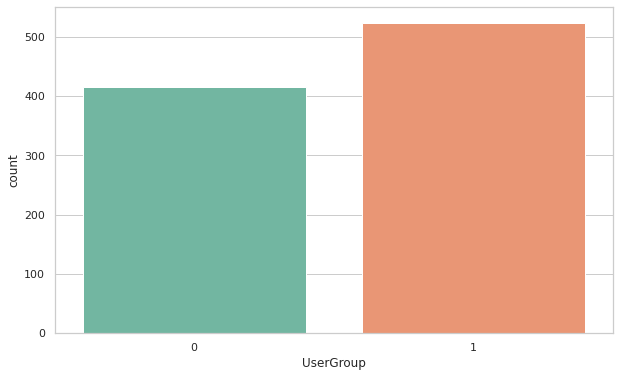

In [81]:
sns.countplot(data=weekend_check, x = 'UserGroup');

Using a boxplot we can clearly see the difference of these groups:

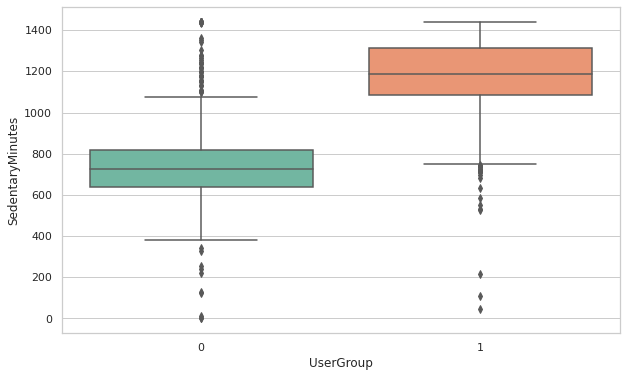

In [82]:
sns.boxplot(x="UserGroup", y="SedentaryMinutes", data=weekend_check);

Group 1 is the more sedentary one as it has a higher median for the `SedentaryMinutes` distribution.

#### **Does this behaviour persist on weekends?**

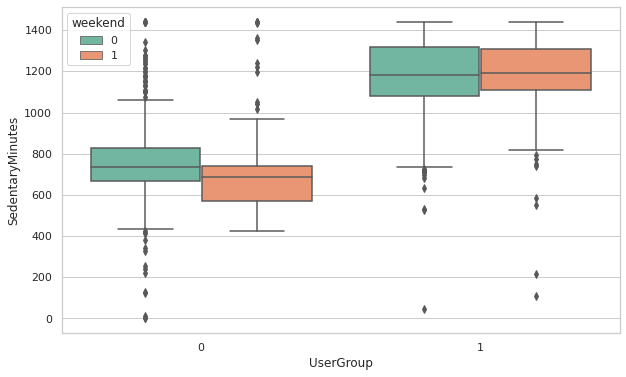

In [83]:
sns.boxplot(x="UserGroup", y="SedentaryMinutes", hue = 'weekend', data=weekend_check);

#### **For the less sedentary group, is there a difference in the shape of the distribution on weekends?**

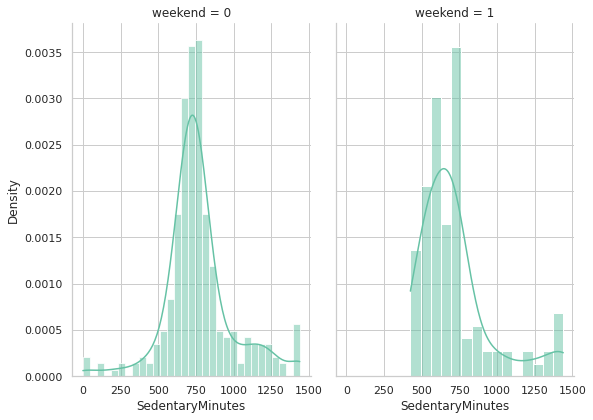

In [84]:
g = sns.FacetGrid(weekend_check[weekend_check['UserGroup']==0], col="weekend", height=6, aspect=.7)
g.map(sns.histplot, "SedentaryMinutes", kde=True, stat='density');

During weekends the distribution of sedentary minutes is a bit more skewed to the lower numbers, so users may be more active during weekends (makes sense since during the week there is probably a lot of sitting down and working...).

### **Do average values change on weekends?**

To inspect how does sedentary minutes, calories, steps and distance change during the weekend we'll do a trick with temp tables.

Steps to our analysis:
* Create a temp table to include a *weekend* boolean column
* Get the averages of queried columns in the temp table using a GROUP BY statement.

In [85]:
# Create temporary table for weekend column
temp_query = """
CREATE TEMP TABLE weekendTable
AS
SELECT 
	SedentaryMinutes,
	Calories,
	TotalSteps,
	TotalDistance,
	CASE 
		WHEN STRFTIME('%w',ActivityDate) IN ('0','6')
			THEN 1
		ELSE 0
	END weekend
FROM dailyActivity_merged
-- Created temp table to check for weekends on weekend column
"""
cur.execute(temp_query)

In [86]:
# Get averages from SQL GROUP BY statement
avg_query = """
SELECT 
	weekend,
	AVG(SedentaryMinutes),
	AVG(Calories),
	AVG(TotalSteps),
	AVG(TotalDistance)	
FROM weekendTable
GROUP BY weekend;
"""
weekend_avgs = pd.read_sql(avg_query, con)

In [87]:
weekend_avgs

,weekend,AVG(SedentaryMinutes),AVG(Calories),AVG(TotalSteps),AVG(TotalDistance)
0,0,996.181295,2301.516547,7668.699281,5.505108
1,1,977.110204,2309.546939,7550.571429,5.446000


### **Sleeping habits for each user group**

In [88]:
sleep_df['UserGroup'] = sleep_df['Id'].apply(is_above)

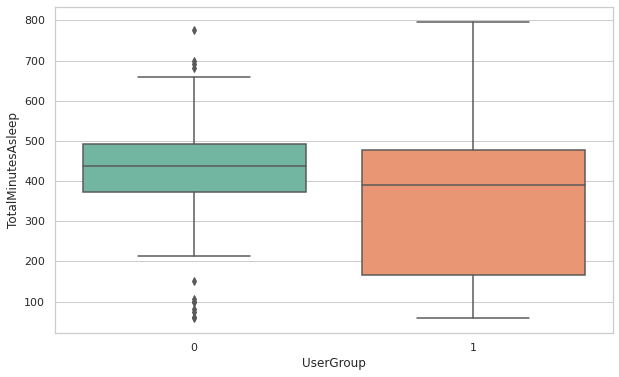

In [89]:
sns.boxplot(x="UserGroup", y="TotalMinutesAsleep", data=sleep_df);

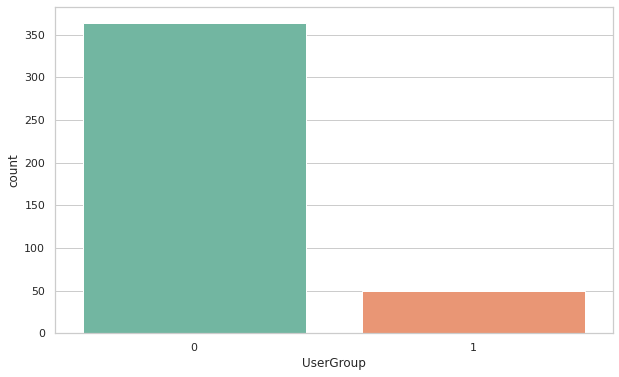

In [90]:
sns.countplot(data = sleep_df, x = 'UserGroup');

Number of rows in each group (in the `sleep_df` dataframe):

In [91]:
sleep_df['UserGroup'].value_counts()

0    364
1     49
Name: UserGroup, dtype: int64

In [92]:
print('Distinct users in group 0 (Less Sedentary group)')
print(sleep_df[sleep_df['UserGroup']==0]['Id'].nunique())

print('Distinct users in group 1 (More Sedentary group)')
print(sleep_df[sleep_df['UserGroup']==1]['Id'].nunique())

Distinct users in group 0 (Less Sedentary group)
14
Distinct users in group 1 (More Sedentary group)
10


There is a huge imbalance here: there are 364 records of daily sleep activity for the less sedentary group while only 49 from the more sedentary group.

The total number of distinct users from the less sedentary group is 14 while for the more sedentary group there are only 10 (out of 19 possible ones) distinct users.

## Joinning Ativity data with sleep data

In [93]:
join_query = """
SELECT 
	A.Id,
	A.ActivityDate,
	A.SedentaryMinutes,
	S.TotalMinutesAsleep
FROM 
	dailyActivity_merged A
INNER JOIN sleepDay_merged S
ON 
	A.Id = S.Id AND
    A.ActivityDate = S.SleepDay;
"""
activity_sleep_df = pd.read_sql(join_query, con)

In [94]:
activity_sleep_df.head()

,Id,ActivityDate,SedentaryMinutes,TotalMinutesAsleep
0,1503960366,2016-04-12,728,327
1,1503960366,2016-04-13,776,384
2,1503960366,2016-04-15,726,412
3,1503960366,2016-04-16,773,340
4,1503960366,2016-04-17,539,700


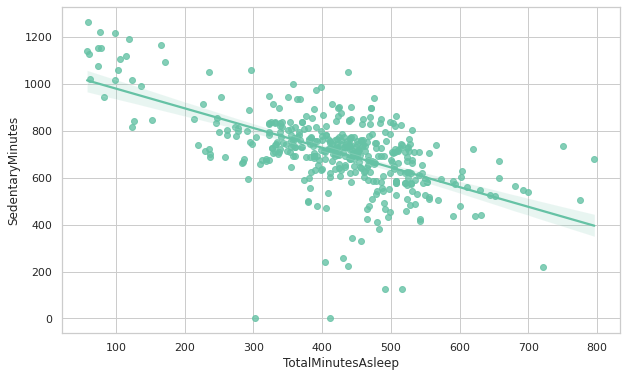

In [95]:
sns.regplot(data = activity_sleep_df,
                x = 'TotalMinutesAsleep',
                y = 'SedentaryMinutes');

This is an interesting graph: there is a clear tendency of users with more minutes asleep to be less sedentary. So, one conclusion might be that the more you sleep, the more active you are during the day!

# **Share**

Now that we have our analysis and found some interesting patterns, let's try to answer our original business question through a story told by our main visuals.

Just as a reminder, we phrased our question as
> **How current user trends can guide marketing strategy?**

---

We'll start our sharing with some basic descriptions. Our dataset has data on **33 different users** who logged their daily activities during the period **between 03.12.2016-05.12.2016**. 

## **Describing the data**

The main data on daily activities is in the `full_dailyActivity_df` and we can get descriptive statistics with the `describe()` method:

In [96]:
sns.set_palette("flare")
sns.set_context("paper", font_scale=2)

In [97]:
full_dailyActivity_df.loc[:, full_dailyActivity_df.columns != 'Id'].describe().T

,count,mean,std,min,25%,50%,75%,max
TotalSteps,936.0,7670.551282,5073.379140,0.0,3818.000,7441.000,10733.5000,36019.000000
TotalDistance,936.0,5.513162,3.916497,0.0,2.645,5.265,7.7200,28.030001
TrackerDistance,936.0,5.498750,3.899143,0.0,2.645,5.265,7.7125,28.030001
LoggedActivitiesDistance,936.0,0.108633,0.621181,0.0,0.000,0.000,0.0000,4.942142
VeryActiveDistance,936.0,1.509103,2.662802,0.0,0.000,0.220,2.0900,21.920000
ModeratelyActiveDistance,936.0,0.569968,0.884687,0.0,0.000,0.240,0.8000,6.480000
LightActiveDistance,936.0,3.355096,2.033258,0.0,1.960,3.380,4.7900,10.710000
SedentaryActiveDistance,936.0,0.001613,0.007361,0.0,0.000,0.000,0.0000,0.110000
VeryActiveMinutes,936.0,21.255342,32.885736,0.0,0.000,4.000,32.0000,210.000000
FairlyActiveMinutes,936.0,13.622863,20.010368,0.0,0.000,7.000,19.0000,143.000000


For the sleep habits data, we can use the `describe()` method on the `sleep_df` dataframe:

In [98]:
sleep_df.loc[:, sleep_df.columns != 'Id'].describe()

,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,UserGroup
count,413.000000,413.000000,413.000000,413.000000
mean,1.118644,419.467312,458.639225,0.118644
std,0.345521,118.344679,127.101607,0.323761
min,1.000000,58.000000,61.000000,0.000000
25%,1.000000,361.000000,403.000000,0.000000
50%,1.000000,433.000000,463.000000,0.000000
75%,1.000000,490.000000,526.000000,0.000000
max,3.000000,796.000000,961.000000,1.000000


## **Distributions**

### **By acivity type**

Three types of activities:
* Very Active
* Fairly Active
* Lightly Active

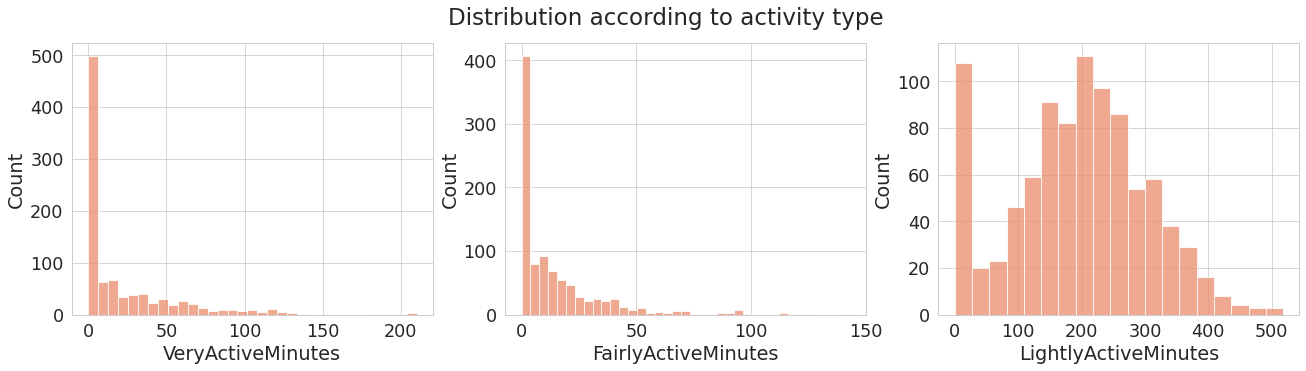

In [99]:
fig, axes = plt.subplots(1, 3, figsize=(22, 5))
fig.suptitle('Distribution according to activity type')

sns.histplot(data = full_dailyActivity_df, x = 'VeryActiveMinutes', ax = axes[0]);

sns.histplot(data = full_dailyActivity_df, x = 'FairlyActiveMinutes', ax = axes[1]);

sns.histplot(data = full_dailyActivity_df, x = 'LightlyActiveMinutes', ax = axes[2]);

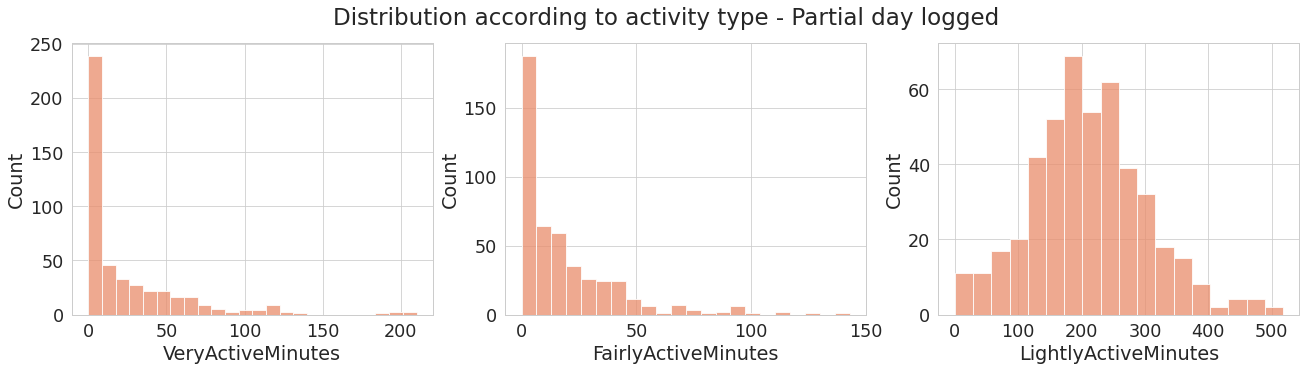

In [100]:
fig, axes = plt.subplots(1, 3, figsize=(22, 5))
fig.suptitle('Distribution according to activity type - Partial day logged')

sns.histplot(data = not_logged_day_df, x = 'VeryActiveMinutes', ax = axes[0]);

sns.histplot(data = not_logged_day_df, x = 'FairlyActiveMinutes', ax = axes[1]);

sns.histplot(data = not_logged_day_df, x = 'LightlyActiveMinutes', ax = axes[2]);

The `LightlyActiveMinutes` distribution is very symmetric with no peak at very few minutes of activity. Users who log the entire day may end up registering a lot of `LightlyActiveMinutes` while those who log only a part of the day might be registering only activities with higher demand.

Let's see the distribution of total logged time in this second group.

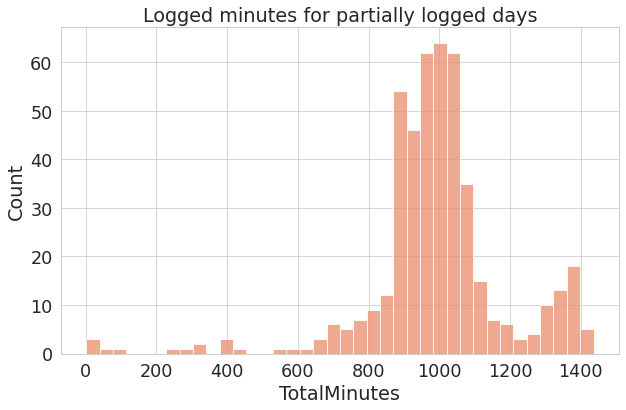

In [101]:
sns.histplot(data = not_logged_day_df, x = 'TotalMinutes')
plt.title('Logged minutes for partially logged days');


### **Calories and Distance**

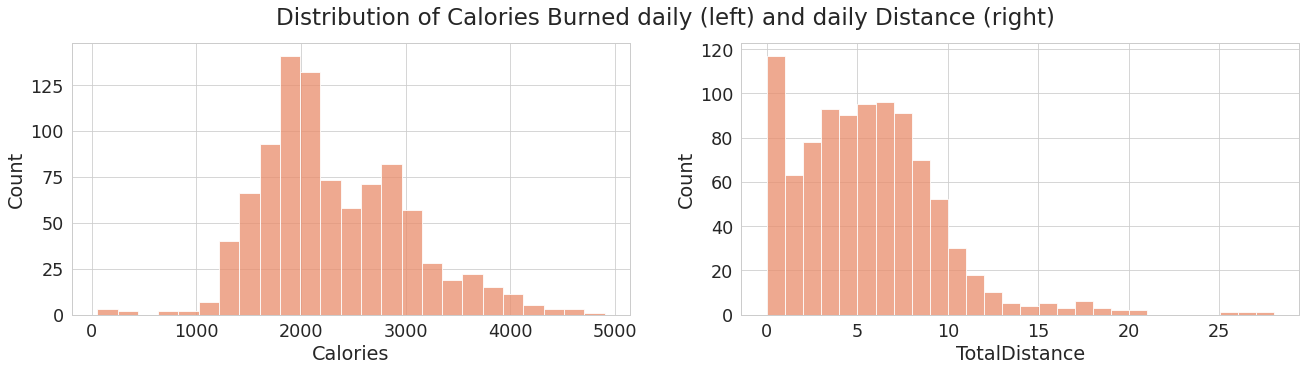

In [102]:
fig, axes = plt.subplots(1, 2, figsize=(22, 5))
fig.suptitle('Distribution of Calories Burned daily (left) and daily Distance (right)')

sns.histplot(data=full_dailyActivity_df, x="Calories", ax = axes[0]);

sns.histplot(data=full_dailyActivity_df, x="TotalDistance", ax = axes[1]);

The distribution of burned calories is a bit skewed to the low calories while the distance distribtion is highly skewed to lower distances.

### **Sleeping habits**

Text(380, 30, '7h of sleep')

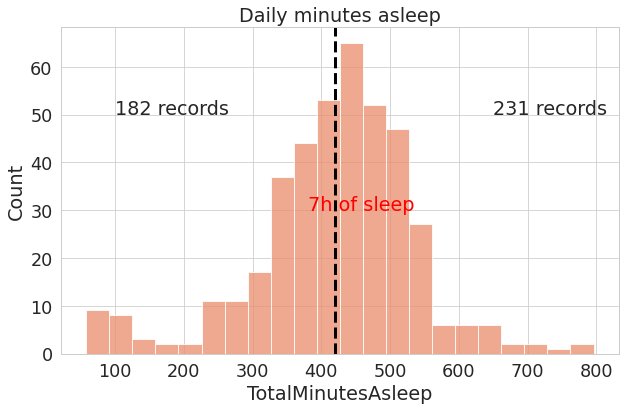

In [103]:
sns.histplot(data = sleep_df, x = 'TotalMinutesAsleep')
plt.title('Daily minutes asleep')

plt.axvline(420, 0, 65, color='black', ls = '--', lw = 3);

plt.annotate('182 records', (100,50))
plt.annotate('231 records', (650,50))
plt.annotate('7h of sleep', (380,30), color='red')

## **Day of the week: does it make a difference?**

Now that we had a galnce at our data and its distributions, does the day of the week make a considerable difference in user behavious to justify some marketing or functionality built to target specific days of activity?

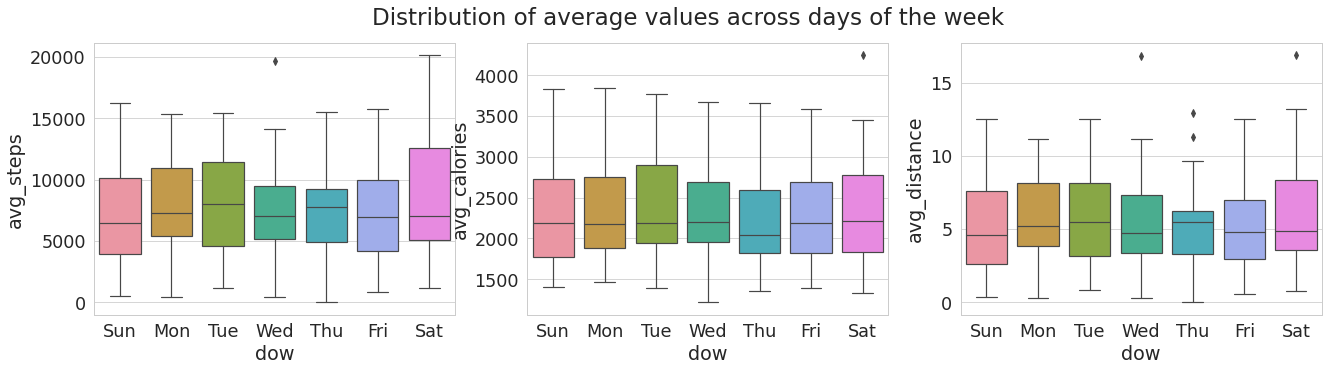

In [104]:
fig, axes = plt.subplots(1, 3, figsize=(22, 5))
fig.suptitle('Distribution of average values across days of the week')

sns.boxplot(x="dow", y="avg_steps", data=activity_dist, ax=axes[0]).set_xticklabels(['Sun','Mon','Tue','Wed','Thu','Fri', 'Sat']);

sns.boxplot(x="dow", y="avg_calories", data=activity_dist, ax=axes[1]).set_xticklabels(['Sun','Mon','Tue','Wed','Thu','Fri', 'Sat']);

sns.boxplot(x="dow", y="avg_distance", data=activity_dist, ax=axes[2]).set_xticklabels(['Sun','Mon','Tue','Wed','Thu','Fri', 'Sat']);

With the current data, there is no considerable difference between the average Steps Taken, Calories Burned or Distance across different days of the week.

### **Sleep across days of the week**

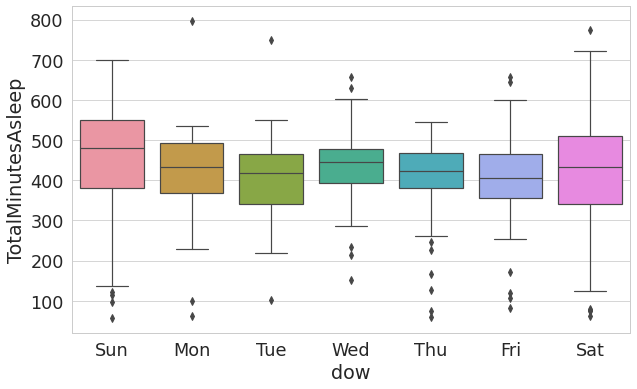

In [105]:
sns.boxplot(x="dow", y="TotalMinutesAsleep", data=sleep_df,
            order = ['0','1','2','3','4','5','6']).set_xticklabels(['Sun','Mon','Tue','Wed','Thu','Fri', 'Sat']);

There is no clear distinction between the days of the week. However we can see that sunday has the largest median for `TotalMinutesAsleep` and saturday appears to be the most spread oout distribution.

## **Do calories burned depend on steps taken?**

intercept: 1689.1510000144017
slope: [0.08138959]


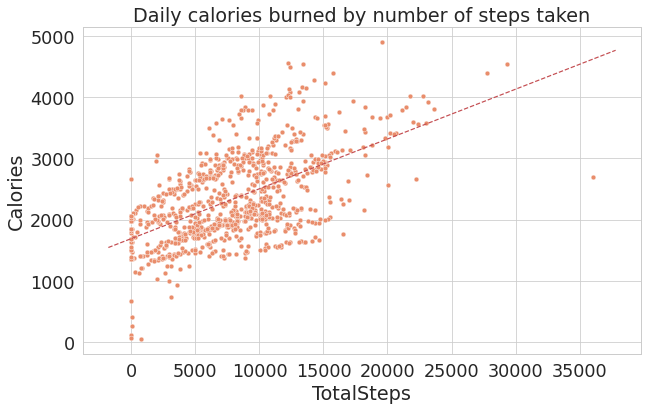

In [106]:
get_regression(full_dailyActivity_df)
plt.ylabel('Calories')
plt.title('Daily calories burned by number of steps taken');


As expected the amount of calories burned in a day grows as the user takes more steps. An inetersting fact is that the intercept of the regression line represents the amount of burned calories in a day with **no steps** taken. This is the amount of calories users are burning in a very sedentary day. According to the [Healthline site](https://www.healthline.com/health/calories-burned-sleeping#Determining-how-many-calories-you-burn), this number corresponds to the *basal metabolic rate*:

> Your basal metabolic rate (BMR), on the other hand, represents the number of calories you individually burn a day at rest, or while you’re sedentary. This includes sleeping and sitting.

To compare these estimates with our data, we can get the intercept value with a **simple linear regression**. In our data, this value is ~1689.15 Calories. We can get some descriptive statistics for the *BMR*:

In [107]:
full_dailyActivity_df[full_dailyActivity_df['TotalSteps']==0]['Calories'].describe()

count      73.000000
mean     1747.876712
std       408.255433
min        57.000000
25%      1557.000000
50%      1841.000000
75%      1981.000000
max      2664.000000
Name: Calories, dtype: float64

## **Categorizing users**

Now that we know a bit more about users activities, can we categorize our users in a way that is natural from the data?

### **How much time in a day do users spend being sedentary?**

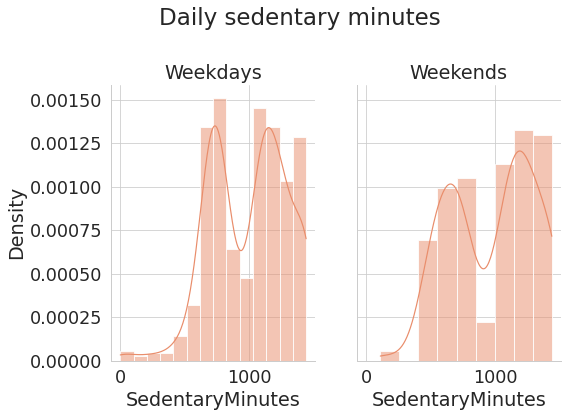

In [108]:
g = sns.FacetGrid(weekend_check, col="weekend", height=6, aspect=.7)
g.map(sns.histplot, "SedentaryMinutes", kde=True, stat='density')
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle('Daily sedentary minutes')
axes = g.axes.flatten()
axes[0].set_title("Weekdays")
axes[1].set_title("Weekends");

It seems there are two groups of users based on the distribution of `SedentaryMinutes`.
We can see the average `SedentaryMinutes` per user:

In [109]:
avg_sed_minutes

,Id,AvgSedentaryMinutes
0,1927972279,1317.419355
1,6775888955,1299.423077
2,8253242879,1287.368421
3,8583815059,1267.225806
4,1624580081,1257.741935
5,4020332650,1237.258065
6,2320127002,1220.096774
7,4057192912,1217.250000
8,1844505072,1206.612903
9,6290855005,1193.034483


Calling group 1 the more sedentary one and group 0 the less sedentary one, we can check if this behaviour persist on weekends or not

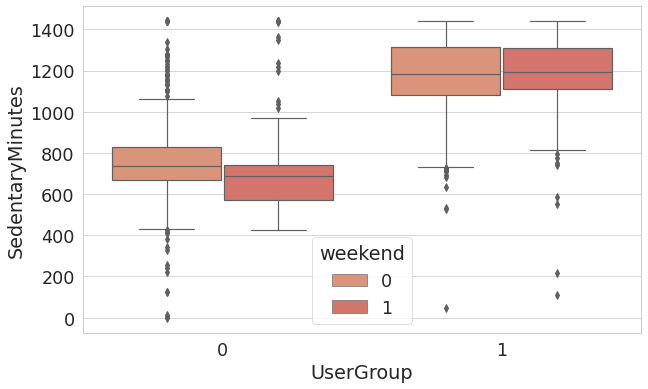

In [110]:
sns.boxplot(x="UserGroup", y="SedentaryMinutes", hue = 'weekend', data=weekend_check);

### **Do average values change on weekends?**

In [111]:
weekend_avgs

,weekend,AVG(SedentaryMinutes),AVG(Calories),AVG(TotalSteps),AVG(TotalDistance)
0,0,996.181295,2301.516547,7668.699281,5.505108
1,1,977.110204,2309.546939,7550.571429,5.446000


## **Do sleep habits influence sedentary time?**

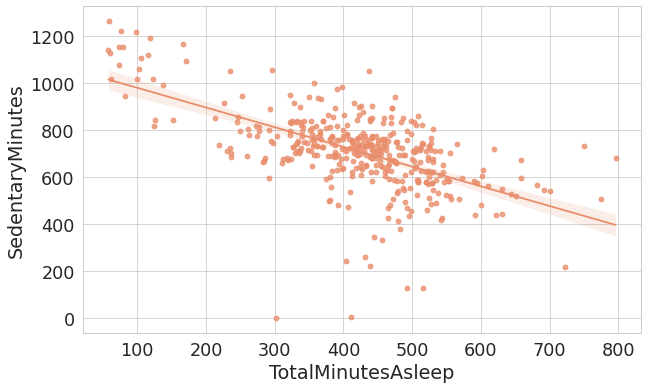

In [112]:
sns.regplot(data = activity_sleep_df,
                x = 'TotalMinutesAsleep',
                y = 'SedentaryMinutes');

This is an interesting graph: there is a clear tendency of **users with more minutes asleep to be less sedentary**. So, one conclusion might be that the more you sleep, the more active you are during the day!

---

# **Act**

Using only the daily activity from our 33 users we reached some interesting conclusions!

Top high-level insights are:
* There is **no clear distinction in user activity across different days of the week**;
* The average number of steps taken daily is around 7670. According to the [CDC](https://www.cdc.gov/media/releases/2020/p0324-daily-step-count.html):
    > higher daily step counts are associated with lower mortality risk from all causes.

    If our product can output the number of steps in real time, we can **motivate users to reach a certain number of steps daily**! Once again, the CDC informs us that :
    
    > compared with taking 4,000 steps per day, a number considered to be low for adults, taking 8,000 steps per day was associated with a 51% lower risk for all-cause mortality (or death from all causes). Taking 12,000 steps per day was associated with a 65% lower risk compared with taking 4,000 steps.
* If the goal is to burn some calories, there is a **linear relation between steps taken and calories burned**. Our step monitor could use user data to fit a model and predict how many steps a user should take to reach a certain amount of calories burned. Further investigation into the *MET* data could be very useful to this.
* Regarding sleeping habits, there was a clear decrease of sedentary minutes as the number of minutes asleep increased. So, another goal of the product could be to motivate users to keep a consistent and sufficient sleeping schedule. Going back to the [CDC](https://www.cdc.gov/media/releases/2020/p0324-daily-step-count.html):
    > Being physically active has many benefits, including reducing a person’s risk of obesity, heart disease, type 2 diabetes, and some cancers. And on a daily basis, it can help people feel better and sleep better.

---


